In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 14)

In [9]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [15]:
#How many customers exited(churned) vs stayed?
churn_counts = df['Exited'].value_counts()
print("Stayed:", churn_counts.get(0, 0))
print("Churned:", churn_counts.get(1, 0))


Stayed: 7963
Churned: 2037


In [16]:
#What is the distrubtion of gender in the dataset?
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)



Gender
Male      5457
Female    4543
Name: count, dtype: int64


Average Credit Score:
Stayed (Exited=0): 651.8531960316463
Exited (Exited=1): 645.3514972999509


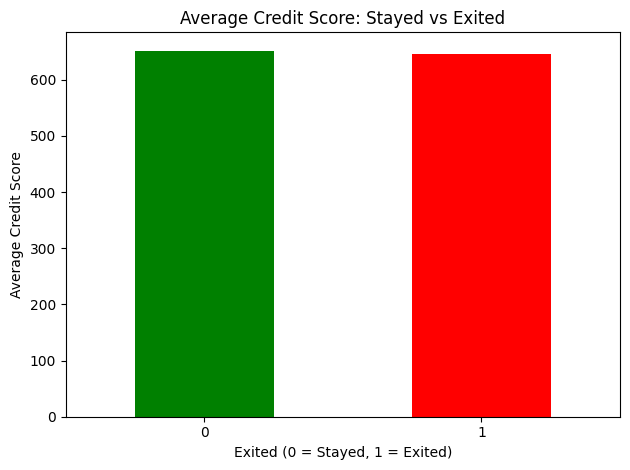

In [17]:
#what is the average credit score of customer who exited vs stayed?
import pandas as pd
import matplotlib.pyplot as plt
avg_credit_score = df.groupby('Exited')['CreditScore'].mean()
print("Average Credit Score:")
print("Stayed (Exited=0):", avg_credit_score.get(0, 'N/A'))
print("Exited (Exited=1):", avg_credit_score.get(1, 'N/A'))
avg_credit_score.plot(kind='bar', color=['green', 'red'])
plt.title('Average Credit Score: Stayed vs Exited')
plt.xlabel('Exited (0 = Stayed, 1 = Exited)')
plt.ylabel('Average Credit Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



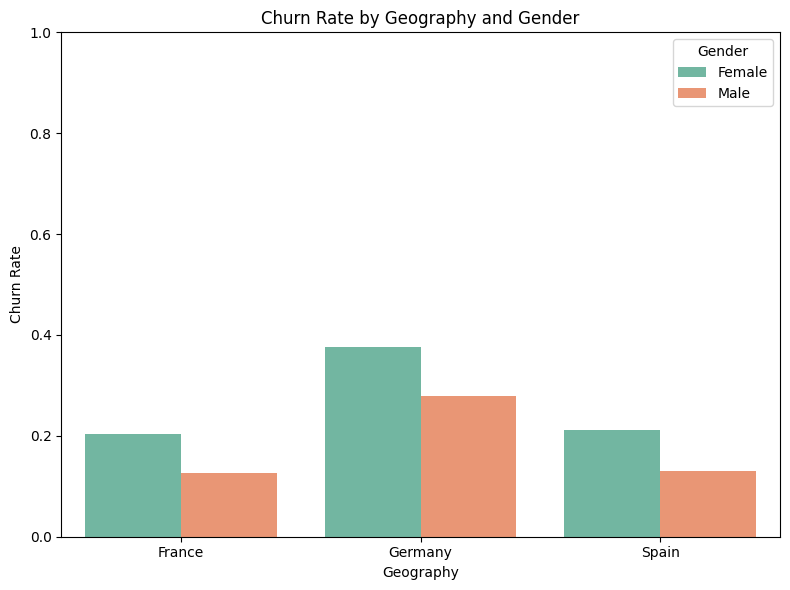

In [18]:
#how does churn rate vary by geography and gender?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
churn_by_geo_gender = df.groupby(['Geography', 'Gender'])['Exited'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=churn_by_geo_gender, x='Geography', y='Exited', hue='Gender', palette='Set2')
plt.title('Churn Rate by Geography and Gender')
plt.ylabel('Churn Rate')
plt.xlabel('Geography')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()



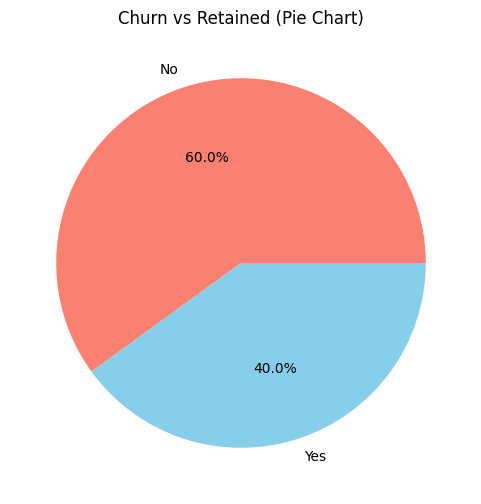

In [3]:
#What is the distribution of churned vs. retained customers?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame({'Churn': ['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No']})
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['salmon', 'skyblue'])
plt.title('Churn vs Retained (Pie Chart)')
plt.show()



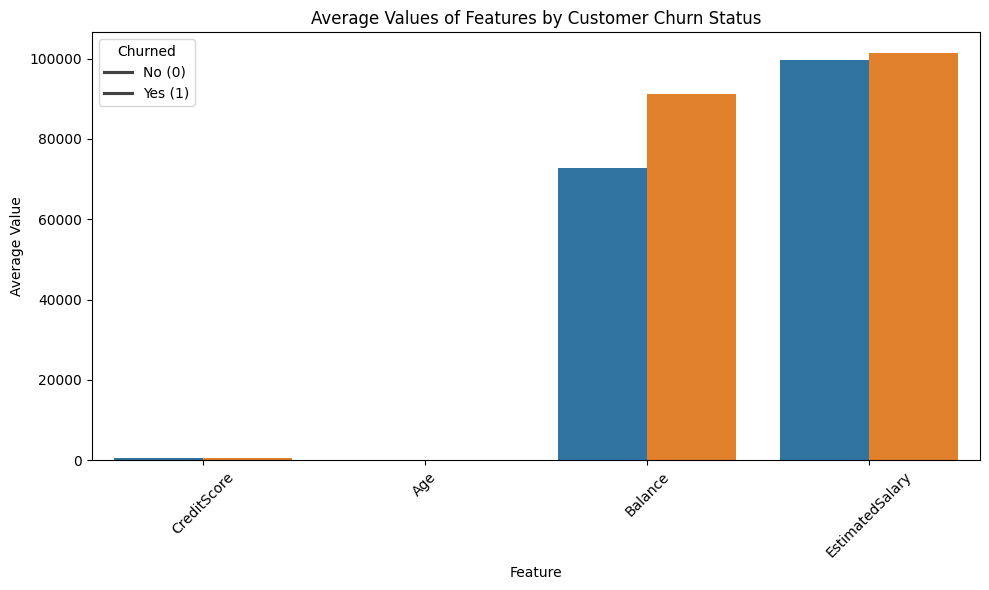

In [22]:
#What is the average credit score, age, balance, and estimated salary of churned vs. retained customers? 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
mean_values = df.groupby('Exited')[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].mean().round(2)
mean_values = mean_values.reset_index()
mean_values_melted = pd.melt(mean_values, id_vars='Exited', 
                             var_name='Feature', value_name='AverageValue')
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_values_melted, x='Feature', y='AverageValue', hue='Exited')
plt.title('Average Values of Features by Customer Churn Status')
plt.ylabel('Average Value')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.legend(title='Churned', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()




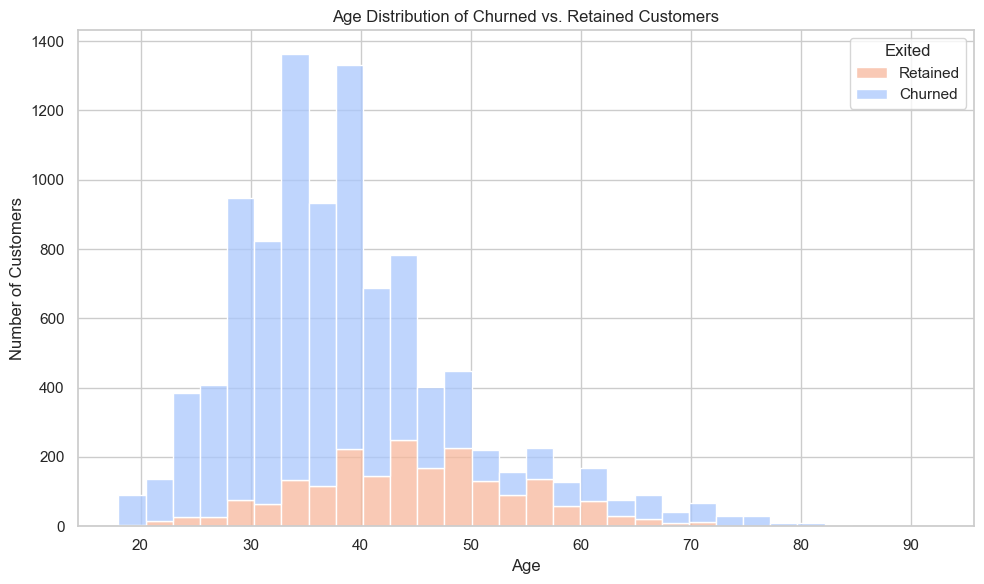

In [23]:
#What is the age distribution of churned vs. retained customers?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=30, palette='coolwarm')
plt.title('Age Distribution of Churned vs. Retained Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['Retained', 'Churned'])
plt.tight_layout()
plt.show()



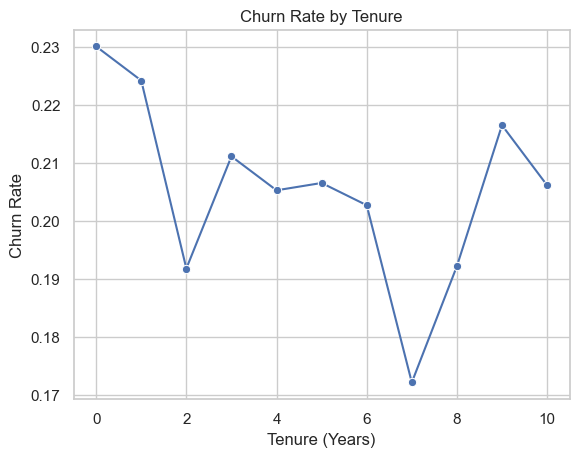

In [24]:
#Does tenure affect churn?
import seaborn as sns
import matplotlib.pyplot as plt
tenure_churn_rate = df.groupby('Tenure')['Exited'].mean().reset_index()
sns.lineplot(data=tenure_churn_rate, x='Tenure', y='Exited', marker='o')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_5128\2273212168.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_churn_rate, x='NumOfProducts', y='Exited', palette='Blues_d')


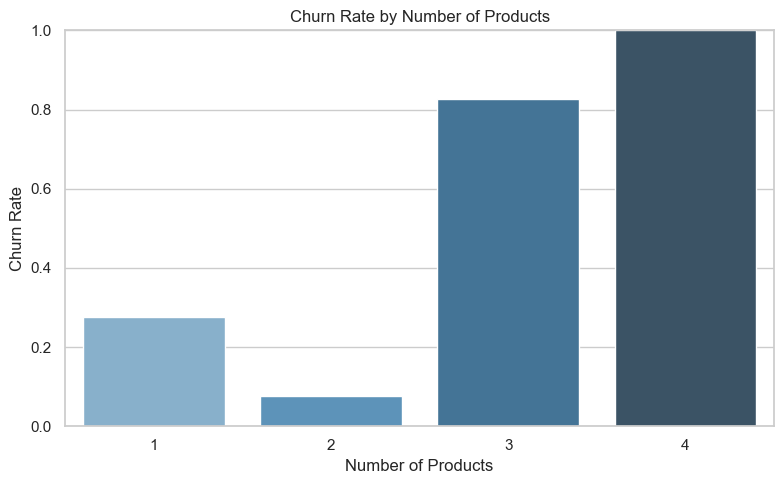

In [29]:
#Do customers with more products churn more?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
product_churn_rate = df.groupby('NumOfProducts')['Exited'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=product_churn_rate, x='NumOfProducts', y='Exited', palette='Blues_d')
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()





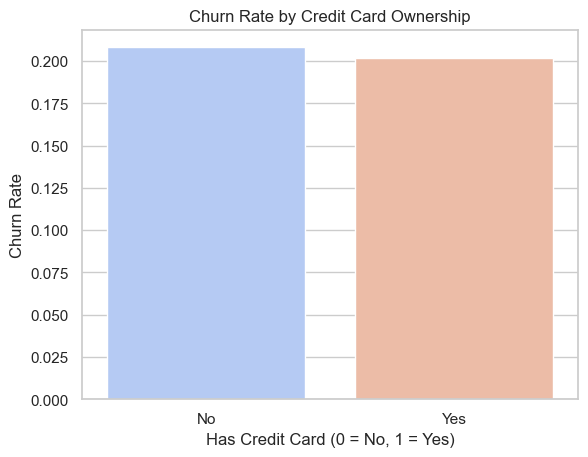

In [30]:
#Do customers with a credit card churn more?
import seaborn as sns
import matplotlib.pyplot as plt
creditcard_churn_rate = df.groupby('HasCrCard')['Exited'].mean().reset_index()
sns.barplot(data=creditcard_churn_rate, x='HasCrCard', y='Exited', hue='HasCrCard', palette='coolwarm', legend=False)
plt.title('Churn Rate by Credit Card Ownership')
plt.xlabel('Has Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(True, axis='y')
plt.show()



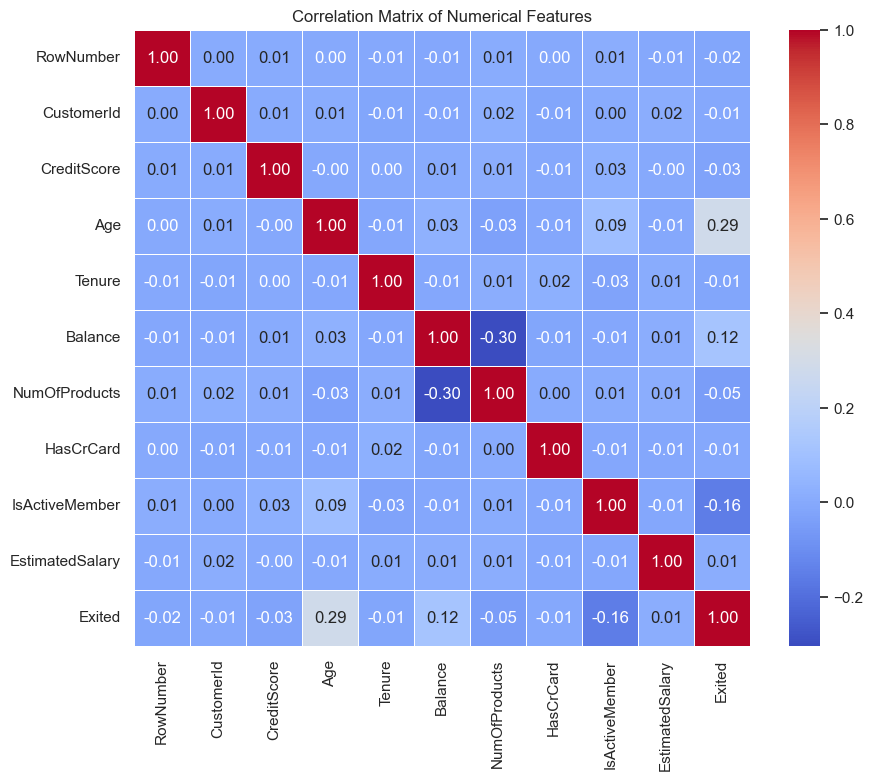

In [31]:
#Correlation matrix for numerical features?
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


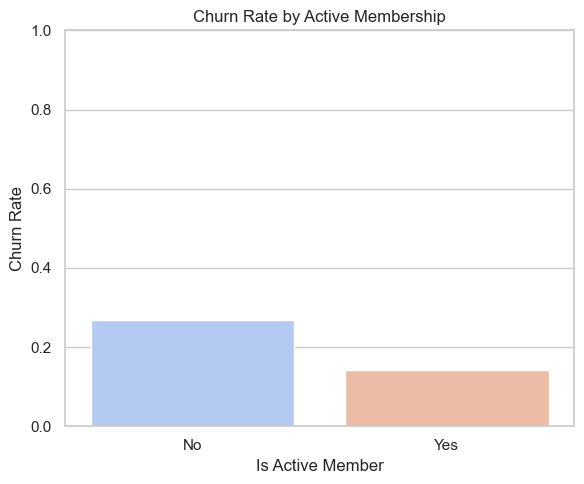

In [32]:
#Hoe does being an active member affect churn?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
active_churn = df.groupby('IsActiveMember')['Exited'].mean().reset_index()
active_churn['IsActiveMember'] = active_churn['IsActiveMember'].map({0: 'No', 1: 'Yes'})
active_churn['Hue'] = active_churn['IsActiveMember']  # Dummy hue to avoid warning
plt.figure(figsize=(6, 5))
sns.barplot(data=active_churn, x='IsActiveMember', y='Exited', hue='Hue', palette='coolwarm', legend=False)
plt.title('Churn Rate by Active Membership')
plt.xlabel('Is Active Member')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


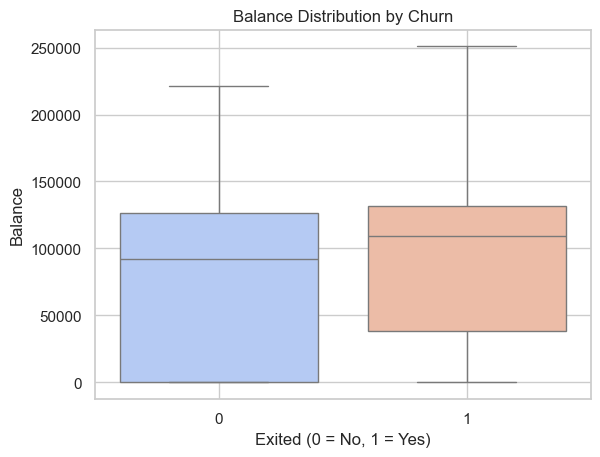

In [33]:
#Are there patterns between balance and churn?
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df, x='Exited', y='Balance', hue='Exited', palette='coolwarm', legend=False)
plt.title('Balance Distribution by Churn')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Balance')
plt.grid(True)
plt.show()





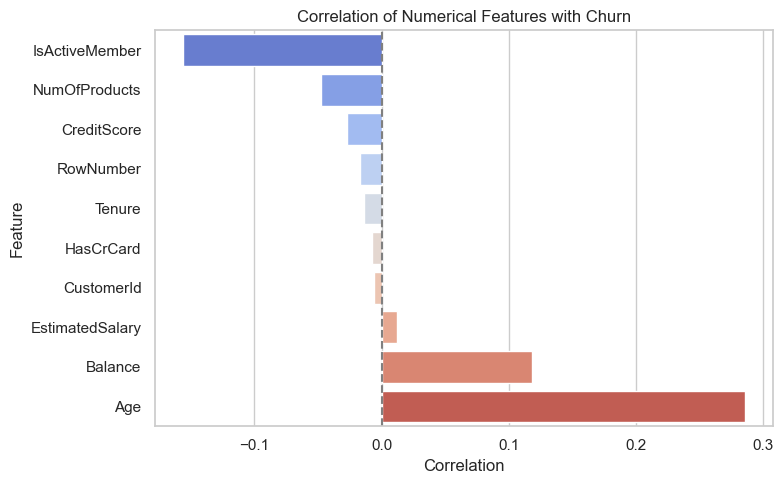

In [36]:
#Correlation between numerical variables and churn?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include='number').columns
correlation_with_churn = df[numerical_cols].corr()['Exited'].drop('Exited').sort_values()
corr_df = correlation_with_churn.reset_index()
corr_df.columns = ['Feature', 'Correlation']
plt.figure(figsize=(8, 5))
sns.barplot(data=corr_df, x='Correlation', y='Feature', hue='Feature', dodge=False, palette='coolwarm', legend=False)
plt.title('Correlation of Numerical Features with Churn')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

